In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [2]:
# Hyperparameters
batch_size = 64
learning_rate = 0.001
num_epochs = 10


In [3]:
# Download and prepare the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

8.3%

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw




100.0%
100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [4]:
# Define the 2-layer fully connected neural network
class Net(nn.Module):
    def __init__(self, number_inputs, hidden_size, number_outputs):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(number_inputs, hidden_size)  # Input size: 28x28, Output size: 128
        self.fc2 = nn.Linear(hidden_size, number_outputs)       # Input size: 128, Output size: 10 (num_classes)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input images
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return x

In [5]:
# Initialize the network and define loss function and optimizer
net = Net(number_inputs= 28*28, hidden_size=128, number_outputs=10)

criterion = nn.CrossEntropyLoss() #loss
optimizer = optim.Adam(net.parameters(), lr=learning_rate) #optimizer
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)  # Learning rate scheduler

In [6]:
# Training function
def train_epoch():
    net.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Training Batch [{i+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}')
            running_loss = 0.0

    return running_loss / len(train_loader)

In [7]:
# Test function
def test():
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on the test set: {accuracy:.2f}%')
    return accuracy

Epoch [1/10]
Training Batch [100/938], Loss: 1.6462
Training Batch [200/938], Loss: 1.3821
Training Batch [300/938], Loss: 1.3399
Training Batch [400/938], Loss: 1.3162
Training Batch [500/938], Loss: 1.3009
Training Batch [600/938], Loss: 1.3354
Training Batch [700/938], Loss: 1.2987
Training Batch [800/938], Loss: 1.2839
Training Batch [900/938], Loss: 1.2831
Accuracy on the test set: 48.36%
Epoch [2/10]
Training Batch [100/938], Loss: 1.2815
Training Batch [200/938], Loss: 1.2853
Training Batch [300/938], Loss: 1.2568
Training Batch [400/938], Loss: 1.2617
Training Batch [500/938], Loss: 1.2364
Training Batch [600/938], Loss: 1.2508
Training Batch [700/938], Loss: 1.2334
Training Batch [800/938], Loss: 1.2382
Training Batch [900/938], Loss: 1.2167
Accuracy on the test set: 48.87%
Epoch [3/10]
Training Batch [100/938], Loss: 1.2401
Training Batch [200/938], Loss: 1.2242
Training Batch [300/938], Loss: 1.2341
Training Batch [400/938], Loss: 1.2117
Training Batch [500/938], Loss: 1.214

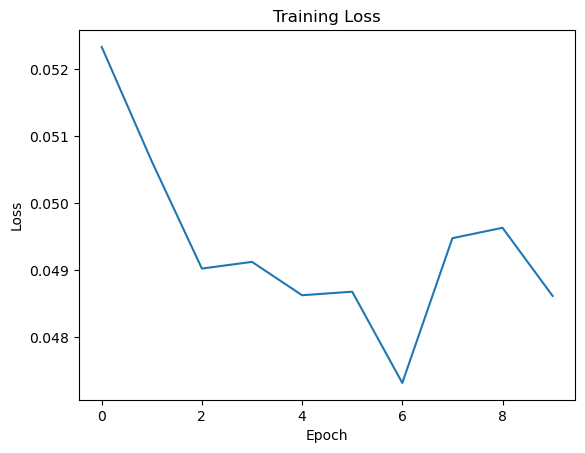

In [8]:
# Training loop
train_losses = []
for epoch in range(num_epochs):
    print(f'Epoch [{epoch+1}/{num_epochs}]')
    train_loss = train_epoch()
    train_losses.append(train_loss)
    test_accuracy = test()
    scheduler.step()  # Step the learning rate scheduler

print('Training finished')

# Plot the loss over epochs
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
